In [58]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
import numpy as np

X= pickle.load(open("X.pickle","rb"))
y= pickle.load(open("y.pickle","rb"))
IMG_SIZE = 80

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

y = np.array(y)

X= X/255

model = Sequential()
model.add(  Conv2D(64,(3,3), input_shape =X.shape[1:]     ))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics= ['accuracy'])

model.fit(X, y, batch_size=32,epochs =13 ,validation_split=0.1)

Train on 22451 samples, validate on 2495 samples
Epoch 1/10
22451/22451 [==============================] - 384s 17ms/sample - loss: 0.6706 - accuracy: 0.5927 - val_loss: 0.6526 - val_accuracy: 0.6112
Epoch 2/10
22451/22451 [==============================] - 379s 17ms/sample - loss: 0.6016 - accuracy: 0.6808 - val_loss: 0.5426 - val_accuracy: 0.7399
Epoch 3/10
22451/22451 [==============================] - 377s 17ms/sample - loss: 0.5132 - accuracy: 0.7496 - val_loss: 0.5405 - val_accuracy: 0.7395
Epoch 4/10
22451/22451 [==============================] - 378s 17ms/sample - loss: 0.4623 - accuracy: 0.7833 - val_loss: 0.5502 - val_accuracy: 0.7359
Epoch 5/10
22451/22451 [==============================] - 377s 17ms/sample - loss: 0.4311 - accuracy: 0.8017 - val_loss: 0.5294 - val_accuracy: 0.7603
Epoch 6/10
22451/22451 [==============================] - 376s 17ms/sample - loss: 0.3984 - accuracy: 0.8218 - val_loss: 0.5082 - val_accuracy: 0.7792
Epoch 7/10
22451/22451 [=====================

In [59]:
model.save('kagle_reader.model')

INFO:tensorflow:Assets written to: kagle_reader.model\assets


In [14]:
new_model = tf.keras.models.load_model('kagle_reader.model')

In [60]:
prediction = new_model.predict(X)

In [71]:
i=5

if prediction[i]>0.5:
    print("its a CAT")
else:
    print("its a DOG")


its a DOG


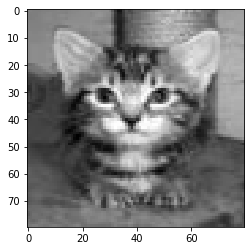

In [72]:
import matplotlib.pyplot as plt
import cv2
new_array= cv2.resize(X[5], (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()